<a href="https://colab.research.google.com/github/hkhong72/big_data/blob/main/221102_2_Chap20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#치매환자의 뇌단면과 정상인의 뇌단면 비교학습
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [ ]:
# ImageDataGenerator (p308)
# horizontal_flip=True  =>수평 대칭 이미지를 50%확률로 만들어 추가합니다
# width_shift_range=0.1 , height_shift_range=0.1 > 전체 크기 15% 범위에서 좌우로 이동합니다.
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, # 수평 대칭 이미지를 50%확률로 만들어 추가
                                  width_shift_range=0.1, # 전체 크기의 15% 범위에서 좌우로 이동
                                  height_shift_range=0.1)
test_datagen = ImageDataGenerator(rescale=1./255) # 테스트 할 데이터는 변형시키면 안됨
train_generator = train_datagen.flow_from_directory('data/data/train',
                                                   target_size=(150, 150),
                                                   batch_size=5,
                                                   class_mode='binary')
test_generator = test_datagen.flow_from_directory('data/data/test',
                                                   target_size=(150, 150),
                                                   batch_size=5,
                                                   class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(150,150,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [ ]:
# 모델 실행 옵션 설정
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

# 학습 조기 중단 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# 모델 실행
history = model.fit(train_generator,epochs=100,
                   validation_data=test_generator,
                   callbacks=[early_stopping])

Epoch 1/100
32/32 [==============================] - 3s 67ms/step - loss: 0.7026 - accuracy: 0.5125 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 2s 63ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6848 - val_accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 2s 63ms/step - loss: 0.6782 - accuracy: 0.6125 - val_loss: 0.6755 - val_accuracy: 0.5500
Epoch 4/100
32/32 [==============================] - 2s 59ms/step - loss: 0.6863 - accuracy: 0.5250 - val_loss: 0.6743 - val_accuracy: 0.5333
Epoch 5/100
32/32 [==============================] - 2s 61ms/step - loss: 0.6744 - accuracy: 0.6000 - val_loss: 0.6703 - val_accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 2s 63ms/step - loss: 0.6675 - accuracy: 0.6000 - val_loss: 0.6759 - val_accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 2s 62ms/step - loss: 0.6590 - accuracy: 0.6562 - val_loss: 0.6354 - val_accuracy: 0.6583
Epoch 

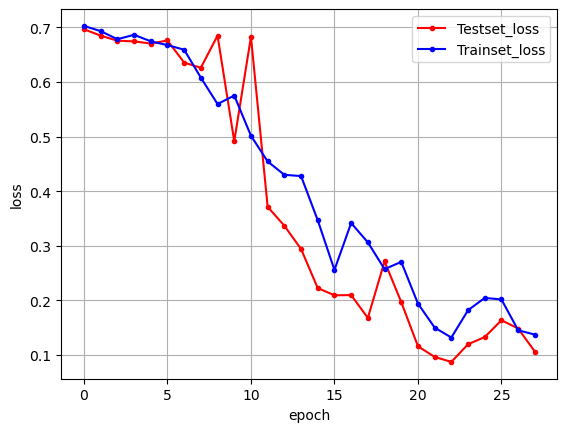

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()